In [3]:
 %matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

#reading data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [6]:
#collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values


In [10]:
#mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#total number of values
n = len(X)

#using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] -mean_x) **2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

print(b1, b0)

0.26342933948939945 325.57342104944223


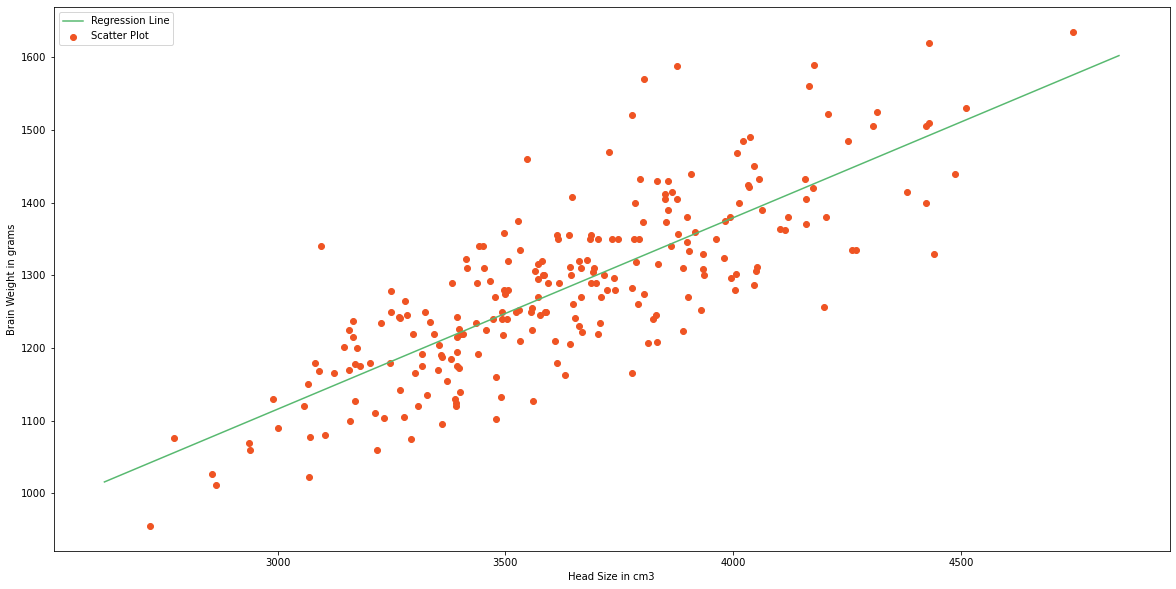

In [12]:
#plotting values and Regression line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

#calculating line values of x and y 
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# plotting line
plt.plot(x,y, color = '#58b970', label = 'Regression Line')

#plotting scatter points
plt.scatter(X, Y, c = '#ef5423', label = 'Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [15]:
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1- (ss_r/ss_t)
print(r2)

0.6393117199570003


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




In [18]:
#cannot use Rank 1 matrix in scikit learn

X = X.reshape((n, 1))



In [19]:
#creating model
reg = LinearRegression()


In [20]:
#fitting training data
reg = reg.fit(X,Y)

In [21]:
#Y prediction

Y_pred = reg.predict(X)

In [22]:
#calculating RMSE and RR2 Score
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957
